
# Fundamentals of Quantum Computation Using Qiskit v0.2X Developer

In [1]:
import matplotlib as plt
import numpy
import math
from qiskit import QuantumCircuit, QuantumRegister, assemble, Aer, BasicAer, execute
from qiskit.quantum_info import Statevector, state_fidelity, average_gate_fidelity, process_fidelity, hellinger_fidelity
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from qiskit.extensions import XGate

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\DaikiMurata\anaconda3\lib\site-packages\qiskit\aqua\operators\operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))


## 1
Which statement will create a quantum circuit with four quantum bits and four classical bits?

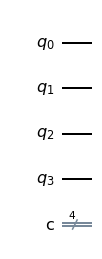

In [3]:
qc = QuantumCircuit(4, 4)
qc.draw('mpl')


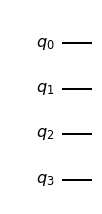

In [4]:
qc = QuantumCircuit(4)
qc.draw('mpl')

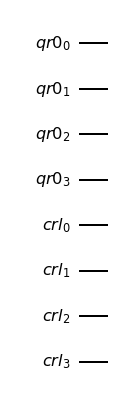

In [5]:
qc = QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'crl'))
qc.draw('mpl')

In [6]:
qc = QuantumCircuit([4, 4])
qc.draw('mpl')

CircuitError: 'Expected an instance of Qubit, Clbit, or AncillaQubit, but was passed 4'

# 2
Given this code fragment, what is the probability that a measurement would result in |0> ?
```
qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)
```

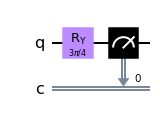

In [7]:
qc = QuantumCircuit(1,1)
qc.ry(3 * math.pi/4, 0)
qc.measure(0,0)
qc.draw('mpl')

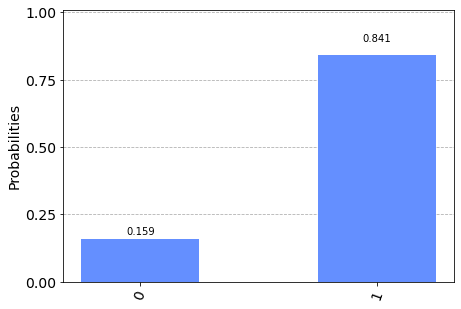

In [8]:
qasmsim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

# 5
Which code fragment will produce a maximally entangled, or Bell, state?

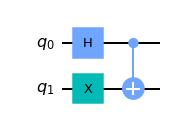

In [9]:
bell = QuantumCircuit(2)
bell.h(0)
bell.x(1)
bell.cx(0, 1)
bell.draw('mpl')

# 8
Which two code fragments, when inserted into the code below, will produce the statevector shown in the output?
```
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
qc = QuantumCircuit(2)
# Insert fragment here
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)
```
Output:
`[0.707+0.j 0.+0.j 0.+0.j 0.707+0.j]`

In [10]:

qc = QuantumCircuit(2)
v = [1/math.sqrt(2), 0, 0, 1/math.sqrt(2)]
qc.initialize(v, [0,1])

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# 11
Which two options would place a barrier across all qubits to the QuantumCircuit below?
```
qc = QuantumCircuit(3,3)
```

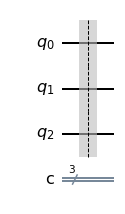

In [11]:
qc= QuantumCircuit(3, 3)
qc.barrier()
qc.draw('mpl')

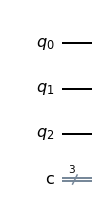

In [12]:
qc= QuantumCircuit(3, 3)
qc.barrier(qc)
qc.draw('mpl')

In [13]:
qc= QuantumCircuit(3, 3)
qc.barrier(3)
qc.draw('mpl')

CircuitError: 'Index out of range.'

# 13
Given the following code, what is the depth of the circuit?
```
qc = QuantumCircuit(2, 2) 
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
```

The depth of a circuit is a metric that calculates the longest path between the data input and the output.

ref. https://medium.com/arnaldo-gunzi-quantum/how-to-calculate-the-depth-of-a-quantum-circuit-in-qiskit-868505abc104

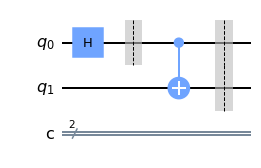

In [14]:
qc = QuantumCircuit(2, 2) 
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
qc.draw('mpl')

In [15]:
print("Circuit depth: ", qc.depth())

Circuit depth:  2


# 14
Which code snippet would execute a circuit given these parameters?

1. Measure the circuit 1024 times,
2. use the QASM simulator,
3. and use a coupling map that connects three qubits linearly
```
qc = QuantumCircuit(3)
# Insert code fragment here
result = job.result()
```

In [16]:
qc = QuantumCircuit(3)

# Insert code fragment here
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, shots=1024, coupling_map=couple_map)

result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.7.2', qobj_id='f864f7ee-109e-4d64-8fbb-e716d483895a', job_id='5955e425-398a-4afc-8c59-5973c51c2a8f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-103', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=2573372209, time_taken=0.000144, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-05-15T23:32:00.268820, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.2'), metadata={'max_memory_mb': 15299, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0002942}, time_taken=0.0009946823120117188)


In [17]:
qc = QuantumCircuit(3)

# Insert code fragment here
qasm_sim = Aer.get_backend('ibmq_simulator')
couple_map = [[0, 1], [0, 2]]
job = execute(qc, loop=1024, coupling_map=couple_map)

result = job.result()
print(result)

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [18]:
qc = QuantumCircuit(3)

# Insert code fragment here
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(qc, backend=qasm_sim, repeat=1024, coupling_map=couple_map)

result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.7.2', qobj_id='e922939e-c9a4-44e9-8131-533b2ca3d838', job_id='09c1b078-3c48-46dc-ae76-01f52c53a6bc', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-106', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=3207577801, time_taken=7.24e-05, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-05-15T23:32:04.075327, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.2'), metadata={'max_memory_mb': 15299, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0001931}, time_taken=0.0)


In [19]:
qc = QuantumCircuit(3)

# Insert code fragment here
qasm_sim = Aer.get_backend('qasm_simulator')
couple_map = [[0, 1], [1, 2]]
job = execute(backend=qasm_sim, qc, shot=1024, coupling_map=couple_map)

result = job.result()
print(result)

SyntaxError: positional argument follows keyword argument (<ipython-input-19-aff4da8c4ff5>, line 6)

# 15
Which of these would execute a circuit on a set of qubits which are coupled in a custom way?
```
from qiskit import QuantumCircuit, execute, BasicAer
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
# insert code here
```

In [20]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
# insert code here
execute(qc, backend, shots=1024, coupling_map=[[0, 1], [1, 2]])

No classical registers in circuit "circuit-108", counts will be empty.


In [21]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
# insert code here
execute(qc, backend, shots=1024, custom_topology=[[0, 1], [2, 3]])

C:\Users\DaikiMurata\anaconda3\lib\site-packages\qiskit\execute_function.py:343: UserWarning: Option custom_topology is not used by this backend
  job = backend.run(experiments, **run_kwargs)
No classical registers in circuit "circuit-110", counts will be empty.


In [22]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
# insert code here
execute(qc, backend, shots=1024, device="qasm_simulator", mode="custom")

C:\Users\DaikiMurata\anaconda3\lib\site-packages\qiskit\execute_function.py:343: UserWarning: Option device is not used by this backend
  job = backend.run(experiments, **run_kwargs)
C:\Users\DaikiMurata\anaconda3\lib\site-packages\qiskit\execute_function.py:343: UserWarning: Option mode is not used by this backend
  job = backend.run(experiments, **run_kwargs)
No classical registers in circuit "circuit-112", counts will be empty.


In [23]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)
# insert code here
execute(qc, backend, mode="custom")

No classical registers in circuit "circuit-114", counts will be empty.


# 18
Which code fragment would yield an operator that represents a single-qubit X gate? 

In [24]:
op = Operator.Xop(0)

AttributeError: type object 'Operator' has no attribute 'Xop'

In [25]:
qc = QuantumCircuit(1)
op = Operator([[0, 1]])
qc.append(op)

ExtensionError: 'Input matrix is not unitary.'

# 19
What would be the fidelity result(s) for these two operators, which differ only by global phase?
```
op_a = Operator(XGate())
op_b = numpy.exp(1j * 0.5) * Operator(XGate())
```

Fidelty(忠実度):2状態の類似度を表す指標
$$F(\rho_1, \rho_2) = Tr[\sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}}]^2$$
状態が純粋状態の場合、$F = |<\psi_1|\psi_2>|^2$

In [26]:
qc_a = QuantumCircuit(1)
op_a = Operator(XGate())
qc_a.append(op_a, [0])
state_a = Statevector.from_instruction(qc_a)


qc_b = QuantumCircuit(1)
op_b = numpy.exp(1j * 0.5) * Operator(XGate())
qc_b.append(op_b, [0])
state_b = Statevector.from_instruction(qc_b)

state_fidelity(state_a, state_b)

1.0

`process_fidelity` is an information theoretic quantity for how close two quantum channels are to each other, and in the case of unitary operators it does not depend on global phase.

In [27]:
process_fidelity(op_a, op_b)

1.0

$$F_{ave} = \frac{dF_{pro}(\epsilon, U)+1}{d+1}$$
$F_{pro}(\epsilon, U)$は2チャンネルのprocess_fidelity

In [28]:
average_gate_fidelity(op_a, op_b)

1.0

# 20
Given this code fragment, which output fits most closely with the measurement probability distribution?
```
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts)
```

In [29]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts)

{'01': 1000}
